# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt.plot.plot.plot.plot.plot.plot.plot.plot.plot.plot.plot

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
csv = pd.read_csv('states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
csv.dropna(subset=['AVG_MATH_8_SCORE'])

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 8 Math*

How many years of data are logged in our dataset? 

In [5]:
len(csv.groupby('YEAR'))

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [6]:
print("Michigan:", csv.groupby('STATE')['AVG_MATH_8_SCORE'].mean()['MICHIGAN'], "OHIO:", csv.groupby('STATE')['AVG_MATH_8_SCORE'].mean()['OHIO'])
print("OHIO HAS HIGHER")

Michigan: 276.1666666666667 OHIO: 282.25
OHIO HAS HIGHER


Find the average for your chosen test across all states in 2019

In [7]:
csv.groupby('YEAR')['AVG_MATH_8_SCORE'].mean()[2019]

281.2641509433962

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [8]:
max(csv.groupby('AVG_MATH_8_SCORE')['STATE'])

(301.0,
 1092    MASSACHUSETTS
 Name: STATE, dtype: object)

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [73]:
csv['experstu'] = [(csv.loc[i, 'TOTAL_EXPENDITURE']/csv.loc[i, 'GRADES_8_G']) for i in range(len(csv))]
csv['mathperrev'] = [(100000 * csv.loc[i, 'AVG_MATH_8_SCORE']/csv.loc[i, 'TOTAL_REVENUE']) for i in range(len(csv))]
csv['revperstu'] = [(csv.loc[i, 'TOTAL_REVENUE']/csv.loc[i, 'GRADES_8_G']) for i in range(len(csv))]

print(csv['experstu'], csv['mathperrev'], csv['revperstu'])

0        45.735424
1       110.648310
2        69.305434
3        48.402488
4        74.701709
           ...    
1710           NaN
1711           NaN
1712           NaN
1713           NaN
1714           NaN
Name: experstu, Length: 1715, dtype: float64 0        9.406899
1             NaN
2        8.133627
3       14.953629
4        0.993906
          ...    
1710          NaN
1711          NaN
1712          NaN
1713          NaN
1714          NaN
Name: mathperrev, Length: 1715, dtype: float64 0        46.167773
1       119.420981
2        66.381675
3        47.539891
4        72.282725
           ...    
1710           NaN
1711           NaN
1712           NaN
1713           NaN
1714           NaN
Name: revperstu, Length: 1715, dtype: float64


Feature engineering justification: **I wanted to determine whether the total expenditure of the state would affect students, as well as determine whether average math scores was correlated to total revenue.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

r = 0.19161865653506693


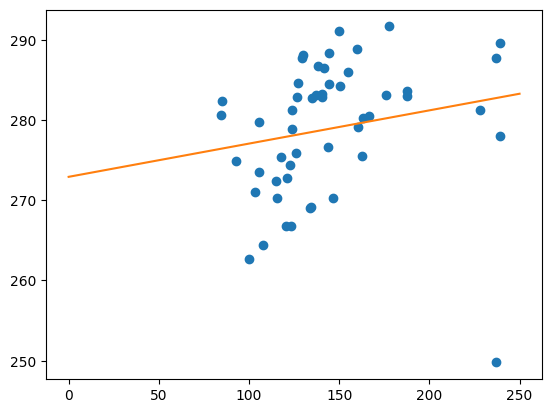

In [81]:
states_group = csv.dropna(subset=['experstu', 'AVG_MATH_8_SCORE', 'STATE'])
mean_exp_per_student = states_group.groupby('STATE')['experstu'].mean()
avg_score_per_student = states_group.groupby('STATE')['AVG_MATH_8_SCORE'].mean()

m,b = np.polyfit(mean_exp_per_student, avg_score_per_student, 1)

r = np.corrcoef(mean_exp_per_student, avg_score_per_student)

def f(x, M, B):
    return M*x+B

t = np.linspace(0, 250, 2500)
plt.plot(mean_exp_per_student, avg_score_per_student, 'o')
plt.plot(t, f(t, m, b))

print("r =",r[0][1])

**This is the state's expenditure per student's impact on an eighth grade student's math performance. As visible, there is a slight upward trend, although it is good to note that the data is still noisy.**

**Visualization 2**

0.1873605486221805


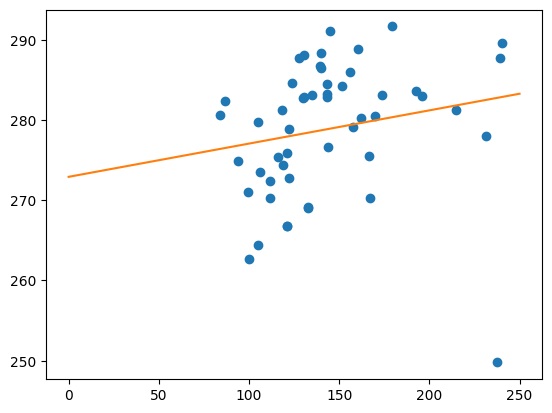

In [83]:
filtered_for_rev = csv.dropna(subset=['STATE', 'revperstu', 'AVG_MATH_8_SCORE'])
mean_rev_per_stu = filtered_for_rev.groupby('STATE')['revperstu'].mean()

m_2,b_2 = np.polyfit(mean_exp_per_student, avg_score_per_student, 1)

plt.plot.plot.plot(mean_rev_per_stu, avg_score_per_student, 'o')
plt(t, f(t, m_2, b_2))

r = np.corrcoef(mean_rev_per_stu, avg_score_per_student)

print(r[0][1])


**This is a graph demonstrating the impact of the state's revenue per student, on the students' score on the MATH exam. Similar to the last viz, the data still is noisy as demonstrated by the r coef as $0.16$**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [84]:
from sklearn.model_selection import train_test_split


In [112]:
data = csv.dropna(subset=['experstu', 'AVG_MATH_8_SCORE', 'STATE', 'revperstu', 'GRADES_8_G', 'TOTAL_REVENUE', 'TOTAL_EXPENDITURE'])

X = data[['revperstu', 'experstu']]
y = data['AVG_MATH_8_SCORE']
print(X, y)

       revperstu    experstu
0      46.167773   45.735424
2      66.381675   69.305434
3      47.539891   48.402488
4      72.282725   74.701709
5      70.742321   72.511405
...          ...         ...
1219  166.533895  169.219101
1220  172.482694  171.484946
1221  170.292813  169.733722
1222  190.514308  189.144080
1223  284.392060  281.426543

[439 rows x 2 columns] 0       252.0
2       265.0
3       256.0
4       261.0
5       272.0
        ...  
1219    288.0
1220    287.0
1221    271.0
1222    289.0
1223    287.0
Name: AVG_MATH_8_SCORE, Length: 439, dtype: float64


In [113]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
# create your model here
model = LinearRegression()

In [116]:
model.fit(X_train, y_train)

LinearRegression()

In [117]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [118]:
model.score(X_test, y_test)

# Wait this is a terrible R-squared, but it looks relatively fine on the graphs

0.05601535609816344

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.plot.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

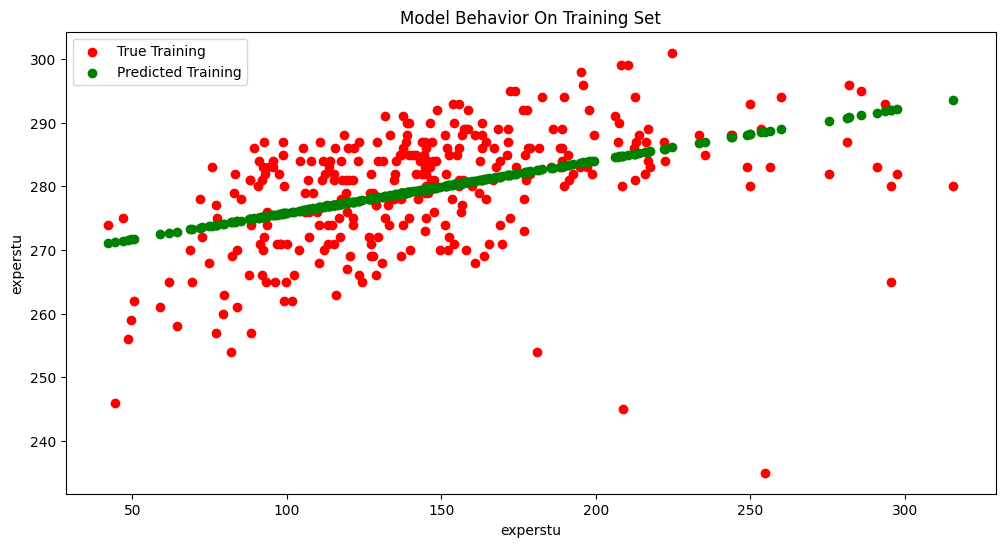

In [121]:
col_name = 'experstu'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('experstu')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

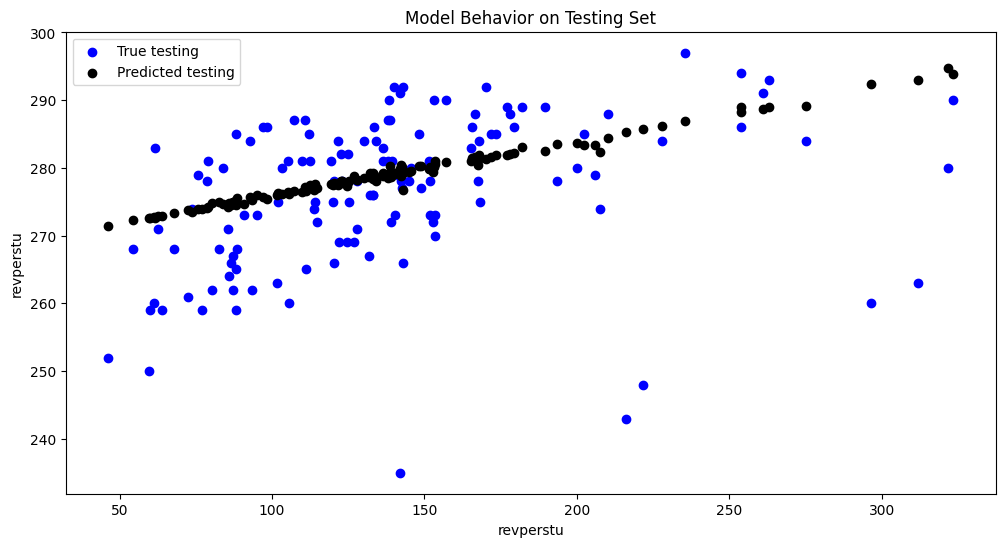

In [123]:
col_name = 'revperstu'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('revperstu')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**In this notebook, I studied the impact of expenditure and revenue of the state on its eighth grade students' math scores. In this, I found that although the graphs seem relatively correlated, the numbers do not prove the same idea. With an $R^2$ of $0.05$, and the coefficient $r\approx 0.185$, it's clear that these statistics may not be the best to pursue when trying to determine a state's math scores. Overall, this study was successful in reaching a valid conclusion stated in numeric logic and reasoning, such that the idea can be further studied in other methods.**